## Power analysis 

#### for "Functional specificity of local synaptic connections in neocortical networks"
##### by Ko, Hofer, Pichler, Buchanan, Sjostrom, Mrsic-Flogel 2011    
##### Nature Letter, doi:10.1038/nature09880

In [105]:
from platform import python_version
print(python_version())

%run -i 'imports_functions.py' 

%matplotlib inline

3.10.4


[Ko et al. 2011](https://www.nature.com/articles/nature09880) (Fig. 2d) results show that co-tuned cells are preferably connected (left below).     
![Ko et al. 2011, Fig. 2d](resources/Ko2011_Fig2d.png "Ko et al. 2011, Fig. 2d") 

However, the results should be evaluated from the full perspective of the numbers in this study. Here is the first relevant piece of information from the article:

> "The data set contained imaging experiments performed on 16 mice and whole-cell recordings from 126 L2/3 pyramidal cells, 116 of which could be matched to neurons functionally characterized in vivo (see Methods). The rate of connectivity was 0.19 (43 connections out of 222 potential connections assayed), in keeping with previous reports6,10. Connection probability, synaptic strength and electrophysiological properties of OGB-1-labelled neurons were not significantly different to those recorded in slices from naive age-matched visual cortex that was not injected with OGB-1 AM (connectivity rate 0.18; 25 connected of 143 tested; Supplementary Fig. 2), indicating that dye loading, anaesthesia and prolonged exposure to infrared laser light during imaging in vivo did not alter these parameters.        
We first examined how connectivity depended on orientation selectivity and on responsiveness to natural movies. Out of the 116 neurons, 77 were responsive to the natural movie, and 79 were orientation selective for grating stimuli (see Methods). Connection probability between orientation-tuned neurons was more than twofold higher than among non-selective and/or non-responsive cells (0.27; 25/94 versus 0.10; 3/31; P=0.050, chi-squared test). The connectivity rate between neurons responsive to the natural movie was significantly higher than among cells non-responsive to the movie (0.28; 30/108 versus 0.04; 2/48; P=0.001, chi-squared test). Taken together, these data indicate that reliably responsive and feature-selective neurons belong to more densely interconnected neocortical subnetworks.     
We then related connection probability to neuronal preference for the angle and direction of drifting gratings (Fig. 2). For this analysis, we only included pairs in which both neurons were responsive (74/113), orientation selective (orientation selectivity index (OSI) >0.4; 53/74), or direction selective (direction selectivity index (DSI) >0.3; 41/53; see Methods and Supplementary Fig.3a–c)."

Therefore, over 16 mice, **126 cells** were recorded in total.
**113 cells** were recorded both *in-vivo* and *in-vitro*.     
**74 cells were responsive**, within which **53 were orientation selective**.     

The actual number of cells found to be co-tuned and connected is not said in the article.       
But we can compute an estimate, based on the informations provided in the Methods ("On average we patched 7.9 neurons (range: 2–14) and assayed 13.9 potential connections (range: 2–31) per slice") and in Figure 2a and supplementary Figure 5 of the article.       
In the paper it is said that 26 connection couples were tested for co-tuned cells (and 44 and 24 couples for cells with increasing $\Delta$s). Considering that in the Methods is said "On average we patched 7.9 neurons (range: 2–14) and assayed 13.9 potential connections (range: 2–31) per slice" (corroborated by Figure 2a and supplementary Figure 5), we can estimate that **between 7 and 8 cells were found to be co-tuned and connected** ($^8C_2=28$ and $^7C_2=21$), less than 10 for $\Delta<67.5deg$, and about 7 cells for $\Delta>67.5deg$

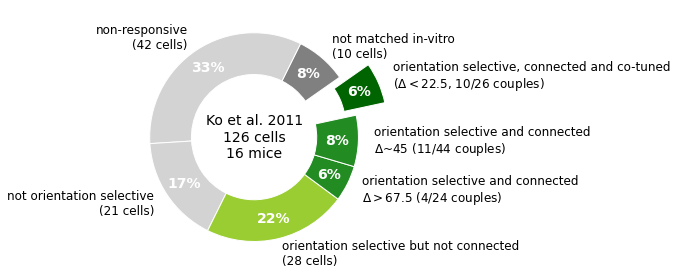

In [107]:
# from 126 total cells we should factor:
Ko_data = np.array([
    10., # not matched in-vitro, 116 remaining
    42., # not responsive, 74 remaining
    21., # not orientation selective, 53 remaining
    28., # orientation selective but not connected, 25 remaining
    7.,  # orientation selective and connected within 67.5 deg, 4/24 couples (with repetition)
    10., # orientation selective and connected within 45 deg, 11/44 couples
    8.   # orientation selective and connected within 22.5deg, 10/26 couples
]) # = 116 total recorded and functionally mapped

Ko_labels = ['not matched in-vitro\n(10 cells)', 'non-responsive\n(42 cells)', 'not orientation selective\n(21 cells)', 'orientation selective but not connected\n(28 cells)', 'orientation selective and connected\n$\Delta>67.5$ (4/24 couples)', 'orientation selective and connected \n$\Delta$~45 (11/44 couples)', 'orientation selective, connected and co-tuned \n($\Delta<22.5$, 10/26 couples)']
inner_colors = ['gray','lightgray','lightgray', 'yellowgreen','forestgreen','forestgreen','darkgreen']
expl = [0,0,0,0,0,0,0.3]
fig, ax = plt.subplots(figsize=[12.8,4.8])
size = 0.4 # to have wedges
wedges, labels, autopct = ax.pie(Ko_data, explode=expl, radius=1, labels=Ko_labels, autopct='%.f%%', startangle=35, pctdistance=0.8, colors=inner_colors, labeldistance=1.15, wedgeprops=dict(width=size, edgecolor='w'))
for lab in labels:
    lab.set_fontsize(12)
for pct in autopct:
    pct.set_fontsize(14)
    pct.set_weight('bold')
    pct.set_color('white')
ax.text(0.5, 0.5, 'Ko et al. 2011\n126 cells\n16 mice', transform = ax.transAxes, va='center', ha='center', backgroundcolor='none', size=14)
# fig.savefig('./results/ko.svg', transparent=False, dpi=800)
plt.show()
fig.clear()
fig.clf()

### Power analysis

6%, or ~8 cells of 126, seems like a small number to accept a claim as important as **local connectivity in cortex is functionally specific**.

Therefore, we would like to understand if the number of orientation selective, co-tuned, and connected cells found in the the study by Ko et al. 2011 is sufficient to support the claim. How can we do it?

In neuroscience, there is a widespread assumption that cortex in general, and V1 in particular is something like a pattern recognition network, or (fixed-point) attractor network, much like the successfull Hopfield model. This assumption is not explicit nor tested, but tacitly assumed by Ko et al. 2011.

Here we aim at giving a simple estimation of the **required number of samples** to be performed to be able to trust the trends found in the study. The goal is to achieve a desired level of statistical power (e.g., 80%) while maintaining a chosen significance level (e.g., α=0.05). The total number of samples will depend on how many orientation patterns were investigated. Since Ko et al. have 8 distinct orientation patterns, the sampling process need to be repeated for each pattern and accumulating the results.
     
We have to explicitly take several assumptions:

- 1µm tickness for a two-photon plane of 0.5x0.5 mm, giving roughly 10000 neurons for the network [Kätzel et al. 2011](https://www.nature.com/articles/nn.2687).      

- We suppose a Hopfield-like network of 10,000 units with 5% sparse random connections. Given the 5% connectivity, each neuron is connected to roughly 5% of the other 9,999 neurons, which is about 500 neurons.

- We assume that only a proportion of them have strong connections due to their similar orientation preferences (arbitrarily high 10% = 50 neurons).

These percentages need to be applied to each of the 8 orientation patterns.

#### Sample size
We can provide a simplified estimation of the required sample size for one orientation pattern with the given parameters assuming a standard normal distribution:    
- anticipated mean of connected units (μ0): 50
- standard deviation (σ): 0.025 
- Significance level (α): 0.05
- Desired statistical power (1 - β): 80% (Z = ~0.845)
- Expected effect size (μ0−μ1): let's assume a low effect size, say 0.10.

Our hypotheses, assuming a normal distribuition of connections, are:
- Null Hypothesis (H0): The proportion of significant connections between co-active and co-tuned neurons is equal to or lower than what would be expected by chance (e.g., 5% due to sparse connectivity).
- Alternative Hypothesis (H1): The proportion of significant connections is higher than expected by chance.

To estimate the required sample size, we used a power analysis library like [statsmodels](https://www.statsmodels.org/devel/generated/statsmodels.stats.power.TTestPower.html).     
Here we used the `TTestPower` class to perform a power analysis for the one sample t-test. It calculates the required sample size based on the specified effect size, alpha level, and desired power, assuming we are interested in comparing a sample to the hypothesized population mean (random connections).

In [104]:
import statsmodels.stats.power as smp

# Define parameters
effect_size = 0.2 # minimal
alpha = 0.05
power = 0.8 # usually required in biological studies
# power = 0.7 # try other values

# Perform power analysis
analysis = smp.TTestPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Required Sample Size for each orientation: {sample_size:.0f}")
print(f"Total Sample Size (8 orientations): {sample_size * 8 :.0f}")
print("assuming a standard deviation (sigma) of", np.sqrt(effect_size * (1 - effect_size) / sample_size) )


Required Sample Size for each orientation: 198
Total Sample Size (8 orientations): 1585
assuming a standard deviation (sigma) of 0.028415941474323102


It follows that the number of cells recorded in Ko et al. 2011 (and also in other papers from the same group) **did not meet the power required to support the claim** (even for just one orientation).

Some online references:     
http://www.biostathandbook.com/power.html     
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_power/bs704_power_print.html     
https://influentialpoints.com/Training/statistical_power_and_sample_size.htm

### Using the MICRONS data
In [Turner et al. 2022](https://doi.org/10.1016/j.cell.2022.01.023) it is reported a positive correlation between mean response to preferred directions and connections (Fig. 7H).    
However, Turner et al. used
1) correlation between cell responses and **total number of connections**, not distinguishing co-tuned cells
2) a **linear** fit. If [weighted least squares](http://www.itl.nist.gov/div898/handbook/pmd/section4/pmd432.htm) or [generalized least squares](https://en.wikipedia.org/wiki/Generalized_least_squares) were used to weight the outliers (here circled in red), the fit (in dashed red) would be different.    
![Turner et al. 2022, Fig. 7H](resources/Turner2022_Fig7h.png "Turner et al. 2022, Fig. 7H")   